In [1]:
from pytdx.hq import TdxHq_API
from pytdx.params import TDXParams
from datetime import datetime, timedelta
import pandas as pd
import polars as pl
import os
from tqdm import tqdm

HOST = '119.147.212.81'
PORT = 7709

In [2]:
api = TdxHq_API()

In [17]:
with api.connect(HOST, PORT):
    data = api.get_security_bars(0, 0, '002594', 800 * 28, 200)
    df = api.to_df(data)
df.head()

,open,close,high,low,vol,amount,year,month,day,hour,minute,datetime
0,261.50,263.60,264.40,261.50,1265100.0,333272576.0,2021,2,4,10,15,2021-02-04 10:15
1,263.60,263.72,264.89,263.35,934800.0,247009536.0,2021,2,4,10,20,2021-02-04 10:20
2,263.71,261.79,263.71,261.79,550000.0,144673024.0,2021,2,4,10,25,2021-02-04 10:25
3,261.75,262.26,262.56,261.67,379500.0,99460864.0,2021,2,4,10,30,2021-02-04 10:30
4,262.26,263.77,263.99,261.76,412800.0,108539136.0,2021,2,4,10,35,2021-02-04 10:35


In [3]:
with api.connect(HOST, PORT):
    mkt = 0
    code = '002594'
    
    # # manually set symbol
    # mkt = 1
    # code = '688076'

    SIZE = 800

    dfs = []
    for page in tqdm(list(range(0, 100))):
        try:
            data = api.get_security_bars(0, mkt, code, page * SIZE, SIZE)
            df_tmp = api.to_df(data)
            if df_tmp is None or len(df_tmp) == 0 or 'open' not in df_tmp.columns:
                continue

            df = df_tmp[['open', 'close', 'high', 'low', 'vol', 'amount', 'datetime']]
            df = pl.DataFrame(df)
            dfs.append(df)
        except Exception as e:
            print(e)

    df_rs = pl.concat(dfs)

    # break

100%|██████████| 100/100 [00:05<00:00, 19.37it/s]


In [4]:
df_rs.to_parquet(f'cn_data_minute/data/{code}.parquet')

- 根据ATR，计算单位区间价差
- 分钟bar
- 找过去n个交易日


In [5]:
df_rs.head()

open,close,high,low,vol,amount,datetime
f64,f64,f64,f64,f64,f64,str
261.81,261.83,262.0,261.81,47200.0,1.2361962e7,"""2022-12-21 10:55"""
261.83,261.85,261.99,261.7,50900.0,1.3323583e7,"""2022-12-21 11:00"""
261.8,262.06,262.11,261.51,83100.0,2.1769548e7,"""2022-12-21 11:05"""
262.1,261.88,262.15,261.88,51500.0,1.3494825e7,"""2022-12-21 11:10"""
261.88,261.31,261.9,261.3,92800.0,2.4283092e7,"""2022-12-21 11:15"""


In [6]:
df_rs['date_str'] = df_rs['datetime'].apply(lambda x: x.split(' ')[0] )

In [7]:
df_rs.filter(pl.col('date_str') == '2023-01-11' ).head()

open,close,high,low,vol,amount,datetime,date_str
f64,f64,f64,f64,f64,f64,str,str
264.9,263.68,264.9,261.41,904300.0,2.37760896e8,"""2023-01-11 09:35""","""2023-01-11"""
263.68,263.98,264.62,263.3,343800.0,9.0703872e7,"""2023-01-11 09:40""","""2023-01-11"""
263.89,263.64,264.6,263.62,264600.0,6.9864688e7,"""2023-01-11 09:45""","""2023-01-11"""
263.64,264.5,264.65,263.64,229600.0,6.0644728e7,"""2023-01-11 09:50""","""2023-01-11"""
264.46,265.63,265.66,264.0,252500.0,6.6907248e7,"""2023-01-11 09:55""","""2023-01-11"""


In [8]:
def get_date_vol_distribution(date_str):
    df_date = df_rs.filter( pl.col('date_str') == date_str )

    def get(i):
        n = 100
        high = int(df_date['high'][i] * n)
        low = int(df_date['low'][i] * n)
        vol = df_date['vol'][i]

        return pl.DataFrame({
            'range': list(range(low, high)),
            'vol': [round(vol / (high - low + 1), 2)] * len(list(range(low, high)))
        })

    df_joint = get(0)
    for i in list(range(1, len(df_date))):
        df_tmp = get(i)
        if df_tmp is None or len(df_tmp) == 0:
            continue

        df_joint = df_joint.join(df_tmp, on='range', how='outer')

        df_joint['vol'] = df_joint['vol'].fill_null(0.0) \
                        + df_joint['vol_right'].fill_null(0.0)
        df_joint = df_joint[['range', 'vol']]

    df_joint = df_joint.sort('range', reverse=True)
    return df_joint

In [9]:
for date_str in list(set(df_rs['date_str'].to_list())):
    df_date_vol = get_date_vol_distribution(date_str)
    df_date_vol.to_parquet(f'cn_data_range_vol/002594/{date_str}.parquet')

In [10]:
df_date_vol.head()

range,vol
i64,f64
19191,7770.87
19190,7770.87
19189,7770.87
19188,7770.87
19187,20514.62


<AxesSubplot:>

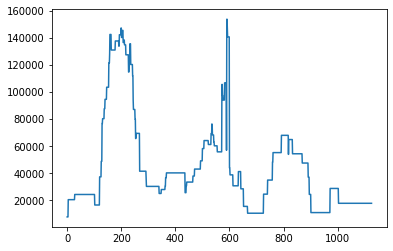

In [11]:
df_date_vol.to_pandas()['vol'].plot()

- 过去n个交易日的 range_vol 合并
- 给定价格，filter 上下 xATR 范围

In [22]:
fnames = os.listdir('cn_data_range_vol/002594/')
fnames.sort()
fnames[:5]

['2020-12-30.parquet',
 '2020-12-31.parquet',
 '2021-01-04.parquet',
 '2021-01-05.parquet',
 '2021-01-06.parquet']

In [75]:
for i in tqdm(list(range(1, 500))):
    date_str = fnames[-i].split('.')[0]
    df_joint = pl.read_parquet(f'cn_data_range_vol/002594/{date_str}.parquet')

    index = fnames.index(f'{date_str}.parquet')

    for i in range(index-1, index-1-20, -1):
        # print(fnames[i])
        df_2 = pl.read_parquet(f'cn_data_range_vol/002594/{fnames[i]}')

        df_joint = df_joint.join(df_2, on='range', how='outer')
        df_joint['vol'] = df_joint['vol'].fill_null(0.0) \
                                + df_joint['vol_right'].fill_null(0.0)
        df_joint = df_joint[['range', 'vol']]

    df_joint.to_parquet(f'cn_data_range_vol/period_20/002594/{date_str}.parquet')

 99%|█████████▉| 496/499 [00:06<00:00, 78.98it/s]


IndexError: list index out of range

In [76]:
def get_support_rate(cur_price, date_str):
    df_joint = pl.read_parquet(f'cn_data_range_vol/period_20/002594/{date_str}.parquet')

    cur_price = cur_price * 100

    df_above = df_joint.filter(pl.col('range') < cur_price + 20 * 100) \
                        .filter(pl.col('range') > cur_price)
    df_below = df_joint.filter(pl.col('range') > cur_price - 20 * 100) \
                        .filter(pl.col('range') <= cur_price)

    rate = round(df_below['vol'].sum() / (df_below['vol'].sum() + df_above['vol'].sum()), 2)
    return rate

In [81]:
get_support_rate(271, '2023-01-11')

0.87